Author: VIBHOR

The Spark Foundation Internship
GRIPMAY21

Task 1: Prediction using supervised ML

Problem Statement: Predict the percentage of a student based on the number of hours studied.

I will be performing the followong steps:-
-Data reading and understanding
-Exploratory Data Analysis
-Building a Simple Regression Model
-Model Evaluation and Prediction

Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
%matplotlib inline

In [2]:
#Reading data from remote link
s_data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported successfully")

s_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
s_data.isnull == True

False

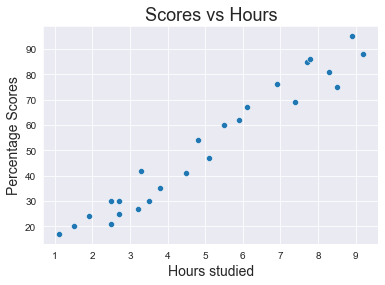

In [4]:
#Plotting the distribution of scores

sns.set_style('darkgrid')
sns.scatterplot(y = s_data['Scores'], x = s_data['Hours'])
plt.title('Scores vs Hours', size = 18)
plt.xlabel('Hours studied', size = 14)
plt.ylabel('Percentage Scores', size = 14)
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between number of hours studies and percentage of score

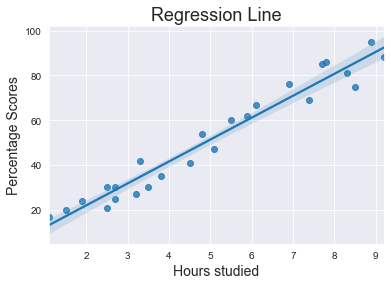

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
#Plotting Regression Line
sns.regplot(x = s_data['Hours'], y = s_data['Scores'])
plt.title('Regression Line', size = 18)
plt.xlabel('Hours studied', size = 14)
plt.ylabel('Percentage Scores', size = 14)
plt.show()
print(s_data.corr())

Preparing The Data
The next step is to divide the data into "attributes"(inputs) and "labels"(oututs)

In [6]:
X = s_data.iloc[:, :-1].values
Y = s_data.iloc[:, 1].values

Splitting the Data:
Now that we have our attributes and labels, the next step is to split the data into training and test sets.

In [7]:
#splitting our data into train and test sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state = 0) 

Training the Algorithm:
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [8]:
regression = LinearRegression()
regression.fit(train_X, train_Y)

print('Training compete.')
print('Model Trained.')

Training compete.
Model Trained.


Predicting the Percentage:
Now that we have trained our model its time to make some predictions.

In [9]:
pred_Y = regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_Y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [10]:
#Comparing actual and predicting marks:
df = pd.DataFrame({'Actual': test_Y, 'Predicted' : pred_Y})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


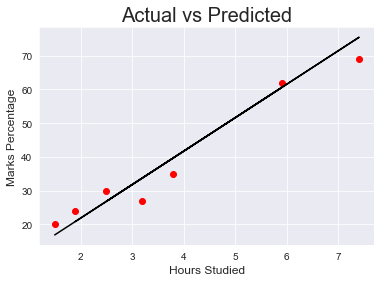

In [11]:
#Plotting actual and predicted marks:
plt.scatter(x=test_X, y=test_Y, color='Red')
plt.plot(test_X, pred_Y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [12]:
#Predicting the score if studied for 9.25 hours/day
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


In [13]:
#According to linear regression model, predicted score if a student studies for 9.25 hrs/ day is 93.893
#Evaluating the model:
#The final step is to evaluate the performance of algorithm using mean square error.
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, pred_Y))

Mean Absolute Error: 4.130879918502486
